In [4]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

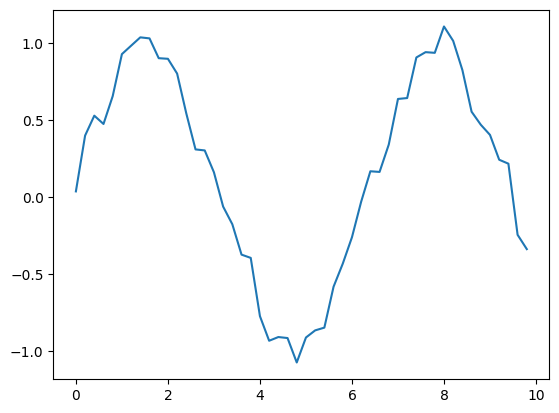

In [24]:
# f = lambda x: [[x_] for x_ in x]
noise_level = 0.1
X_train = np.arange(0, 10, 0.2)
data_size = len(X_train)
X_train = X_train.reshape(data_size,1)

y_train = np.sin(X_train).reshape(data_size,1)
noise = np.random.normal(0, noise_level, len(X_train)).reshape(data_size,1)
y_train = y_train + noise

# y_pred = model.predict(X_train)
plt.plot(X_train, y_train)
plt.show()

In [76]:
width = 100
hidden_layer_sizes = tuple([width]*3)
learning_rate = 'constant'
learning_rate_init = 0.0001

regr = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                   solver='sgd',
                   batch_size=len(X_train),
                   learning_rate=learning_rate,
                   learning_rate_init=learning_rate_init).fit(X_train, y_train)

y_true = regr.predict(X_train)

/Users/halmagyi/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


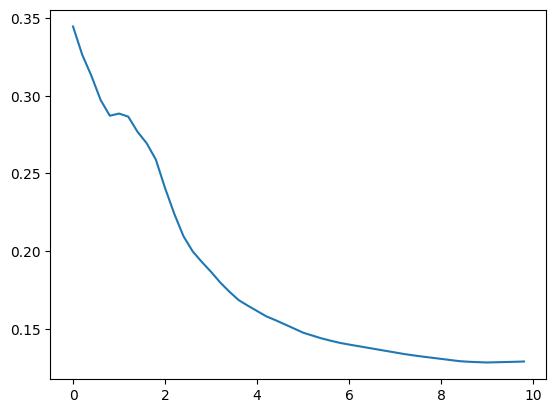

In [77]:
plt.plot(X_train_, y_true)
plt.show()

In [67]:
regr.__dict__

{'activation': 'relu',
 'solver': 'sgd',
 'alpha': 0.0001,
 'batch_size': 50,
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'power_t': 0.5,
 'max_iter': 200,
 'loss': 'squared_error',
 'hidden_layer_sizes': (100, 100, 100, 100, 100),
 'shuffle': True,
 'random_state': None,
 'tol': 0.0001,
 'verbose': False,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'n_iter_no_change': 10,
 'max_fun': 15000,
 'n_features_in_': 1,
 'n_outputs_': 1,
 '_random_state': RandomState(MT19937) at 0x11E7B9940,
 'n_iter_': 200,
 't_': 10000,
 'n_layers_': 7,
 'out_activation_': 'identity',
 'coefs_': [array([[-0.20197287,  0.22090985, -0.11318566,  0.10910264,  0.09079005,
           0.14932283, -0.00436092, -0.04613531,  0.02644142,  0.03883612,
          -0.18631381, -0.13363725,  0.04665227, -0.20654775, -0.14114699,
          -0.13999776,  0.15144224, -0.11743